The dataset used was the food consumption per country in the year 2020. For each country, it can be seen which food were consumed the most and the carbon footprint for each specific food. The dataset was taken from https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-18/food_consumption.csv

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr

In [2]:
sns.set()

### Data Preparation

#### Import the Data

In [3]:
csv_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv'

In [4]:
df = pd.read_csv(csv_url)

In [5]:
df.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


#### Group Data by `country` and `food_category` for later use

In [7]:
grouped_by_country = df.groupby('country')
grouped_by_food = df.groupby('food_category')

#### Simplify the data for generalized data analysis

In [8]:
simplified_by_country_df = grouped_by_country.sum().reset_index()
simplified_by_food_df = grouped_by_food.sum().reset_index()

#### Add a co2 emmission/consumption ratio

In [9]:
simplified_by_country_df['co2_emmission/consumption'] = simplified_by_country_df['co2_emmission'] / simplified_by_country_df['consumption']
simplified_by_food_df['co2_emmission/consumption'] = simplified_by_food_df['co2_emmission'] / simplified_by_food_df['consumption']

### Data Analysis

Initial Questions:
- For each food category, what are the top 5 countries who has the highest consumption of it?
- Does it mean that if a country has a high food consumption, they have a high carbon dioxide emission?
- Which food category produces the most carbon dioxide emission?

#### Exploratory Data Analysis


In [10]:
df.describe()

,consumption,co2_emmission
count,1430.000000,1430.000000
mean,28.110406,74.383993
std,49.818044,152.098566
min,0.000000,0.000000
25%,2.365000,5.210000
50%,8.890000,16.530000
75%,28.132500,62.597500
max,430.760000,1712.000000


<Figure size 864x864 with 0 Axes>

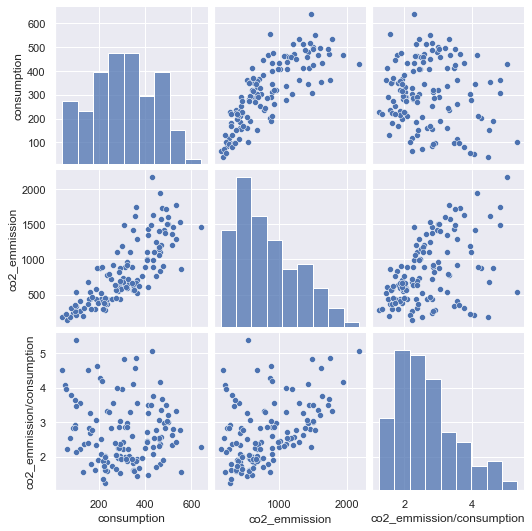

In [11]:
plt.figure(figsize=(12, 12))
sns.pairplot(data=simplified_by_country_df)

plt.show()

##### Check how many countries and which countries are in the dataset

In [12]:
countries = df['country'].unique()
print('There are %d are countries in the dataset:' % len(countries))
for country in countries:
    print(country)

There are 130 are countries in the dataset:
Argentina
Australia
Albania
Iceland
New Zealand
USA
Uruguay
Luxembourg
Brazil
Kazakhstan
Sweden
Bermuda
Denmark
Finland
Ireland
Greece
France
Canada
Norway
Hong Kong SAR. China
French Polynesia
Israel
Switzerland
Netherlands
Kuwait
United Kingdom
Austria
Oman
Italy
Bahamas
Portugal
Malta
Armenia
Slovenia
Chile
Venezuela
Belgium
Germany
Russia
Croatia
Belarus
Spain
Paraguay
New Caledonia
South Africa
Barbados
Lithuania
Turkey
Estonia
Mexico
Costa Rica
Bolivia
Ecuador
Panama
Czech Republic
Romania
Colombia
Maldives
Cyprus
Serbia
United Arab Emirates
Algeria
Ukraine
Pakistan
Swaziland
Latvia
Bosnia and Herzegovina
Fiji
South Korea
Poland
Saudi Arabia
Botswana
Macedonia
Hungary
Trinidad and Tobago
Tunisia
Egypt
Mauritius
Bulgaria
Morocco
Slovakia
Niger
Kenya
Jordan
Japan
Georgia
Grenada
El Salvador
Cuba
China
Honduras
Taiwan. ROC
Angola
Jamaica
Namibia
Belize
Malaysia
Zimbabwe
Guatemala
Uganda
Nepal
Iran
Tanzania
Senegal
Peru
Nicaragua
Vietnam
Et

##### Check how many food categories and which food categories are in the dataset

In [13]:
food_categories = df['food_category'].unique()
print('There are %d food categories in the dataset:' % len(food_categories))
for food_category in food_categories:
    print(food_category)

There are 11 food categories in the dataset:
Pork
Poultry
Beef
Lamb & Goat
Fish
Eggs
Milk - inc. cheese
Wheat and Wheat Products
Rice
Soybeans
Nuts inc. Peanut Butter


#### Which food category produces the most carbon dioxide emission?

In [14]:
top_food_categories_with_highest_co2_to_consumption_ratio = simplified_by_food_df.sort_values('co2_emmission/consumption', ascending=False)
top_food_categories_with_highest_co2_to_consumption_ratio

,food_category,consumption,co2_emmission,co2_emmission/consumption
3,Lamb & Goat,338.02,11837.38,35.019762
0,Beef,1576.04,48633.26,30.857884
6,Pork,2096.08,7419.11,3.539517
5,Nuts inc. Peanut Butter,537.84,951.99,1.770025
2,Fish,2247.32,3588.22,1.596666
4,Milk - inc. cheese,16350.71,23290.00,1.424403
8,Rice,3818.77,4886.91,1.279708
7,Poultry,2758.50,2963.16,1.074192
1,Eggs,1061.29,974.95,0.918646
9,Soybeans,111.87,50.35,0.450076


From the table above, it can be seen that **Lamb & Goat and Beef has a massive difference from all the other food category in terms of co2 emission to consumption ratio**

This actually answers the next question already, that having a high food consumption doesn't necessarily mean that there is a high carbon dioxide emmission. But Lambs & Goat and Beef has a high co2 emmission, so consuming atleast a small amount of may lead to a high co2 emmission.

#### Does it mean that if a country has a high food consumption, they have a high carbon dioxide emission?

To answer this question, we can check and compare the top 25 countries that has the highest food consumption against the top 25 countries that has the highest co2 emmission.

In [15]:
top_25_countries_with_highest_food_consumption = simplified_by_country_df.sort_values('consumption', ascending=False).iloc[:25]
top_25_countries_with_highest_food_consumption

,country,consumption,co2_emmission,co2_emmission/consumption
38,Finland,639.79,1464.63,2.289236
67,Lithuania,555.01,868.90,1.565557
111,Sweden,550.00,1527.03,2.776418
82,Netherlands,534.17,1292.82,2.420241
0,Albania,532.73,1777.85,3.337244
56,Ireland,518.65,1459.67,2.814364
112,Switzerland,514.90,1356.75,2.634978
58,Italy,513.98,1206.33,2.347037
31,Denmark,499.07,1498.18,3.001944
68,Luxembourg,497.90,1598.41,3.210303


In [16]:
top_25_countries_with_highest_co2 = simplified_by_country_df.sort_values('co2_emmission', ascending=False).iloc[:25]
top_25_countries_with_highest_co2

,country,consumption,co2_emmission,co2_emmission/consumption
3,Argentina,429.41,2172.40,5.059034
5,Australia,465.09,1938.66,4.168355
0,Albania,532.73,1777.85,3.337244
84,New Zealand,360.92,1750.95,4.851352
52,Iceland,472.31,1731.36,3.665728
120,USA,491.15,1718.86,3.499664
125,Uruguay,433.60,1634.91,3.770549
17,Brazil,355.16,1616.73,4.552117
68,Luxembourg,497.90,1598.41,3.210303
62,Kazakhstan,468.10,1575.08,3.364837


In [17]:
# for each country in the top 25 highest food consumption, 
# check if they are not in the top 25 highest carbon dioxide emmission
for country in top_25_countries_with_highest_food_consumption['country'].values:
    if(country not in top_25_countries_with_highest_co2['country'].values):
        print(country)

Lithuania
Netherlands
Italy
Maldives
Austria
Estonia
Belgium
Germany
Portugal
Malta


It can be seen that from the tables above that although Lithuania, Netherlands, Italy, Maldives, Austria, Estonia, Belgium, Germany, Portugal and Malta is in the top 25 countries with the highest food consumption, they aren't in the top 25 highest co2 producer. This means that **having a high consumption doesn't necessarily mean that you have a high co2 emmission**. 

#### For each food category, what are the top 5 countries who has the highest consumption of it?

In [18]:
top_5_countries_consumption_per_food = {}
print('\t\t%20s - %s - %s' % ('Country', 'Consumed', 'CO2 Emmission'))
for group_name, group_df in grouped_by_food:
    sorted_group = group_df.sort_values('consumption', ascending=False).iloc[:5];
    top_5_countries_consumption_per_food[group_name] = sorted_group;
    print('\n%s' % group_name)
    for index, val in enumerate(sorted_group.iterrows()):
        i, row  = val
        print('\t[Top %d] %20s - %.2f - %.2f' % (index + 1, row['country'], row['consumption'], row['co2_emmission']))

		             Country - Consumed - CO2 Emmission

Beef
	[Top 1]            Argentina - 55.48 - 1712.00
	[Top 2]               Brazil - 39.25 - 1211.17
	[Top 3]                  USA - 36.24 - 1118.29
	[Top 4]            Australia - 33.86 - 1044.85
	[Top 5]              Bermuda - 33.15 - 1022.94

Eggs
	[Top 1]                Japan - 19.15 - 17.59
	[Top 2]             Paraguay - 18.83 - 17.30
	[Top 3]                China - 18.76 - 17.23
	[Top 4]               Mexico - 18.34 - 16.85
	[Top 5]              Ukraine - 18.01 - 16.54

Fish
	[Top 1]             Maldives - 179.71 - 286.94
	[Top 2]              Iceland - 74.41 - 118.81
	[Top 3]              Myanmar - 54.26 - 86.64
	[Top 4]             Malaysia - 49.43 - 78.92
	[Top 5]             Portugal - 45.39 - 72.47

Lamb & Goat
	[Top 1]              Iceland - 21.12 - 739.62
	[Top 2]          New Zealand - 18.91 - 662.23
	[Top 3]               Kuwait - 15.61 - 546.66
	[Top 4]              Albania - 15.32 - 536.50
	[Top 5]                 Oma

It can be seen that Lamb & Goats and Beef truly has a high impact on the Carbon Dioxide Emmissions produced in kg per person yearly. All the top 5 countries consumption from Lamb & Goats and Beef are in the top 25 countries with the highest CO2 Emmissions produced.

### Data Visualization
to conclude,

#### 1. The food category that has the highest co2 emmission per consumption ratio is Goat & Lambs (1st), followed by Beef (2nd), and then followed by Pork (3rd).  There is a significant difference from the between the 2nd and the 3rd. 

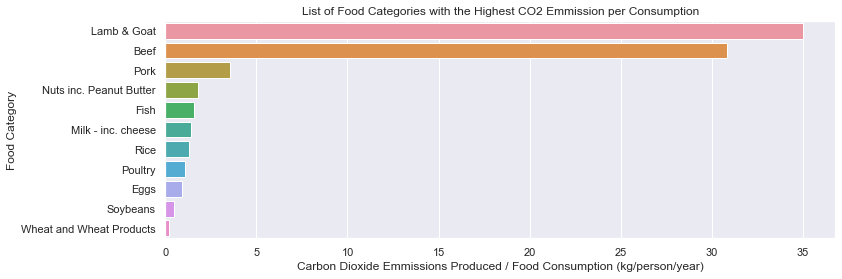

In [19]:
plt.figure(figsize=(12, 4))
plt.title("List of Food Categories with the Highest CO2 Emmission per Consumption")
sns.barplot(x='co2_emmission/consumption', y='food_category', data=top_food_categories_with_highest_co2_to_consumption_ratio)
plt.xlabel('Carbon Dioxide Emmissions Produced / Food Consumption (kg/person/year)')
plt.ylabel('Food Category')

plt.show()

#### 2. (Based from the graph above) Having a high food consumption doesn't necessarily mean that you also have a high CO2 Emmission produced.

#### 3.  All the top 5 countries with the highest food consumption from Lamb & Goats and Beef are in the top 25 countries with the highest CO2 Emmissions produced.

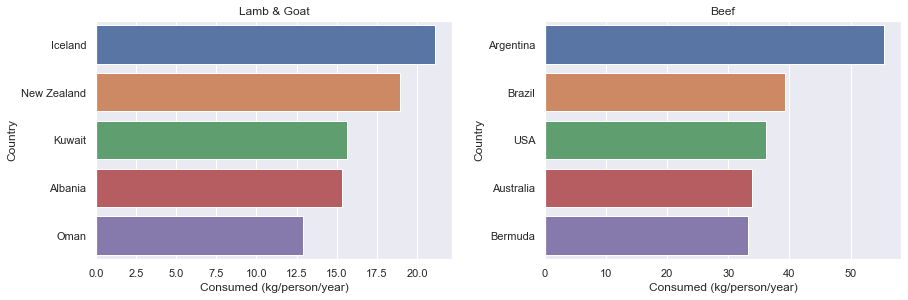

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.tight_layout(w_pad=5)

ax[0].set_title('Lamb & Goat')
sns.barplot(x='consumption', y='country', data=top_5_countries_consumption_per_food['Lamb & Goat'], ax=ax[0])
ax[0].set_xlabel('Consumed (kg/person/year)')
ax[0].set_ylabel('Country')

ax[1].set_title('Beef')
sns.barplot(x='consumption', y='country', data=top_5_countries_consumption_per_food['Beef'], ax=ax[1])
ax[1].set_xlabel('Consumed (kg/person/year)')
ax[1].set_ylabel('Country')

plt.show()

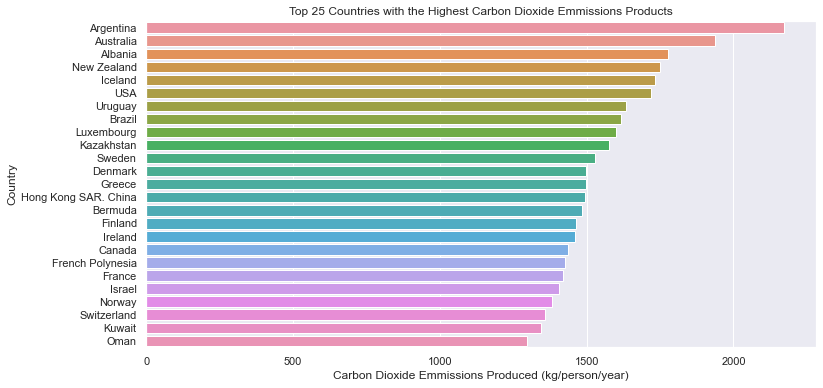

In [21]:
plt.figure(figsize=(12, 6))
plt.title("Top 25 Countries with the Highest Carbon Dioxide Emmissions Products")
sns.barplot(x='co2_emmission', y='country', data=top_25_countries_with_highest_co2)
plt.xlabel('Carbon Dioxide Emmissions Produced (kg/person/year)')
plt.ylabel('Country')

plt.show()